In [1]:
import os
import sys
sys.path.append("..")
import phage_init

In [2]:
#load the saved matrices
import pickle
train_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"train_x_data2.p"), "rb" ) )
test_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"test_x_data2.p"), "rb" ) )
train_Y=pickle.load(open( os.path.join(phage_init.data_dir,"train_y_data2.p"), "rb" ) )
test_Y=pickle.load(open( os.path.join(phage_init.data_dir,"test_y_data2.p"), "rb" ) )
mean_total=pickle.load(open( os.path.join(phage_init.data_dir,"mean_data2.p"), "rb" ) )
std_total=pickle.load(open( os.path.join(phage_init.data_dir,"std_data2.p"), "rb" ) )

In [3]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [9]:

train_X =train_X_total
test_X  =test_X_total
#train_X=di_sc_train
#test_X=di_sc_test
model_name='di_p_data2.h5'
print(train_X.shape)
print(test_X.shape)

(50000, 408)
(7774, 408)


In [5]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17183404928611745887
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7838491554441163132
physical_device_desc: "device: XLA_CPU device"
]


In [6]:
print(train_X.shape[1])
f_num=train_X.shape[1]


408


In [7]:
#model with 2 leyers of 100 LSTM neurons
model = Sequential()
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(f_num, input_dim=f_num, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 408)               166872    
_________________________________________________________________
dropout_1 (Dropout)          (None, 408)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               81800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [8]:
model.fit(train_X, train_Y, epochs=200,verbose=1, batch_size=3000)

Epoch 1/200
50000/50000 [==============================] - 3s 53us/step - loss: 1.5474 - acc: 0.5070
Epoch 2/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.8005 - acc: 0.7696
Epoch 3/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.5786 - acc: 0.8300
Epoch 4/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.4761 - acc: 0.8588
Epoch 5/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.4037 - acc: 0.8798
Epoch 6/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.3521 - acc: 0.8946
Epoch 7/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.3004 - acc: 0.9094
Epoch 8/200
50000/50000 [==============================] - 1s 22us/step - loss: 0.2734 - acc: 0.9167
Epoch 9/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.2398 - acc: 0.9274
Epoch 10/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.2164 - a

50000/50000 [==============================] - 1s 17us/step - loss: 0.0209 - acc: 0.9927
Epoch 82/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0206 - acc: 0.9925
Epoch 83/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0205 - acc: 0.9930
Epoch 84/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0219 - acc: 0.9925
Epoch 85/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0213 - acc: 0.9926
Epoch 86/200
50000/50000 [==============================] - 1s 16us/step - loss: 0.0222 - acc: 0.9923
Epoch 87/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0216 - acc: 0.9931
Epoch 88/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.0216 - acc: 0.9922
Epoch 89/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0213 - acc: 0.9929
Epoch 90/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0198 - acc: 

50000/50000 [==============================] - 1s 17us/step - loss: 0.0124 - acc: 0.9952
Epoch 161/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0140 - acc: 0.9950
Epoch 162/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0140 - acc: 0.9953
Epoch 163/200
50000/50000 [==============================] - 1s 18us/step - loss: 0.0138 - acc: 0.9952
Epoch 164/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0135 - acc: 0.9947
Epoch 165/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0134 - acc: 0.9952
Epoch 166/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0132 - acc: 0.9952
Epoch 167/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0126 - acc: 0.9954
Epoch 168/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.0121 - acc: 0.9957
Epoch 169/200
50000/50000 [==============================] - 1s 17us/step - loss: 0.012

In [10]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7774/7774 [==============================] - 1s 107us/step
Accuracy: 91.81%


In [11]:
#you can save the as a file so you dont have to train it every time
model.save( os.path.join(phage_init.model_dir,model_name))

In [12]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.96      0.95      0.95      1833
     Minor capsid       0.76      0.62      0.68        91
        Baseplate       0.87      0.87      0.87       288
       Major tail       0.90      0.93      0.91       452
       Minor tail       0.89      0.83      0.86       546
           Portal       0.95      0.97      0.96      2474
       Tail fiber       0.74      0.72      0.73       401
       Tail shaft       0.94      0.92      0.93       626
           Collar       0.77      0.72      0.74       190
Head-Tail joining       0.91      0.95      0.93       873

        micro avg       0.92      0.92      0.92      7774
        macro avg       0.87      0.85      0.86      7774
     weighted avg       0.92      0.92      0.92      7774



In [13]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({5: 2474, 0: 1833, 9: 873, 7: 626, 4: 546, 3: 452, 6: 401, 2: 288, 8: 190, 1: 91})
[1833, 91, 288, 452, 546, 2474, 401, 626, 190, 873]



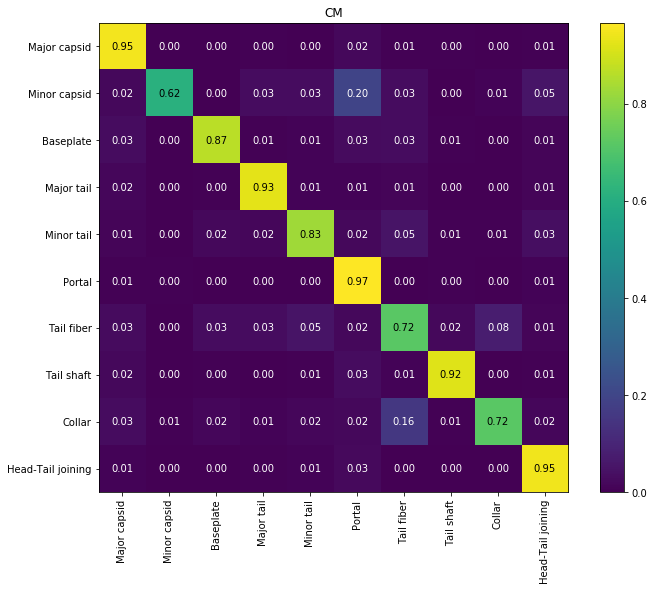

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
plt.show()
CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.8
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")
plt.savefig('bigger_better_ann.png',bbox_inches="tight")
plt.show()


In [33]:
print(train_X[1:5,380:])
print(train_Y[1:5,])

[[-0.1476019  -0.2345018   0.09855249 -0.65945119  0.54687322  2.35424375
  -0.33465356  0.94799186  0.2494373   0.4445915   2.71177698  3.27940423
   0.48885474  1.41133189  0.03761367  0.12410871  1.6266856   0.05767665
  -0.33267268 -0.52861787 -0.18571284 -0.08024276  0.32890864  1.33196358
   0.91839969  0.91753234 -0.5680304   0.37388149]
 [-0.85713902  1.60284649 -0.68613538 -0.65945119  0.61878494 -0.78047071
   1.52658915 -0.62927942 -0.56229154 -0.79307295 -0.38649154  0.4880948
  -0.53467465  0.49532099 -0.71370964  0.17733368  0.95022187 -0.73873129
  -0.33267268 -0.52861787  0.89207071  1.81805622  0.1980336  -0.64551695
   0.71503731  0.71454129 -0.02363968  0.19366583]
 [-0.85713902 -0.2345018  -0.68613538  5.86309681 -0.53979277 -0.78047071
  -0.33465356 -0.62927942 -0.56229154 -0.79307295 -0.38649154 -0.52629084
  -0.53467465 -0.55051823 -0.71370964 -0.6801798  -0.71227374 -0.73873129
  -0.33267268 -0.52861787 -0.93346186  0.5780218  -1.3336891  -1.92479056
  -1.168401